## Intro

The general objective is replicating the data points showed in ESL (Elements of Statistical Learning) book using Python instead of R in the graduate course **Statistical Learning** instructed by professor Dr. Tamer Oraby in The University of Texas Rio Grande Valley. 

The basic idea is using top machine learning libraries in Python such as Numpy and Tensorflow (this one better) instead of the coding in R performed at class. So, the principal goal to creating a mirror code based on the class.

## Exploration

In [1]:
# importing general libraries
import random
import numpy as np
import numpy.random as npr
import tensorflow as tf
import pandas as pd



2024-03-21 15:53:32.585820: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 15:53:36.030204: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


The general idea is coding on jupyter notebooks, and the seed management might be set cell by cell. Nevertheless, using a complete python script, there is just need to call the seed once.

In [2]:
# setting seeds
random.seed(96)
npr.seed(96)

In [35]:
# setting seeds for replication
random.seed(96)
npr.seed(96)

mean_blue = npr.multivariate_normal(
    size = 10,
    mean = np.array([1,0]),
    cov = np.identity(2) ## this 2D vector provides the 2D dimensionality to the the outcome vector (10x2)
)
mean_blue

array([[ 1.06984777, -0.04866513],
       [ 0.34025379,  0.35736923],
       [ 1.13203993, -0.86841854],
       [ 0.47984708,  0.08056762],
       [-0.20220815, -0.99686509],
       [-0.93034998,  0.10395258],
       [ 0.20614499, -0.43662182],
       [ 0.90281127, -0.44721525],
       [ 1.62602389,  0.43533254],
       [ 1.25184462,  0.08354337]])

In [36]:
df_mean_blue = pd.DataFrame(
    data = mean_blue,
    columns = ['cx','cy']
)
df_mean_blue

,cx,cy
0,1.069848,-0.048665
1,0.340254,0.357369
2,1.132040,-0.868419
3,0.479847,0.080568
4,-0.202208,-0.996865
5,-0.930350,0.103953
6,0.206145,-0.436622
7,0.902811,-0.447215
8,1.626024,0.435333
9,1.251845,0.083543


In [37]:
# setting seeds for replication purposes
random.seed(96)
npr.seed(96)

mean_orange = npr.multivariate_normal(
    size = 10,
    mean = np.array([0,1]),
    cov = np.identity(2) ## this 2D vector provides the 2D dimensionality to the the outcome vector (10x2)
)
mean_orange.shape

(10, 2)

In [38]:
df_mean_orange = pd.DataFrame(
    data = mean_orange,
    columns = ['cx','cy']
)
df_mean_orange

,cx,cy
0,0.069848,0.951335
1,-0.659746,1.357369
2,0.132040,0.131581
3,-0.520153,1.080568
4,-1.202208,0.003135
5,-1.930350,1.103953
6,-0.793855,0.563378
7,-0.097189,0.552785
8,0.626024,1.435333
9,0.251845,1.083543


## plotting

In [7]:
# importing plotting libraries
from plotnine import * 
import matplotlib.pyplot as plt

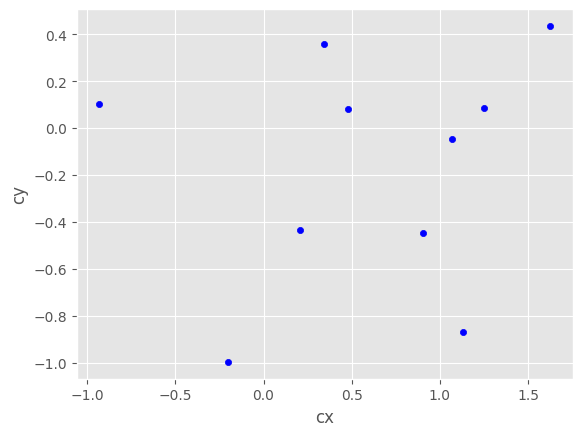

In [8]:
## creating the same theme as used in R
plt.style.use('ggplot')

plt_mean_blue = df_mean_blue.plot.scatter(
    x = 'cx',
    y = 'cy',
    c = 'blue'
)
plt.show()

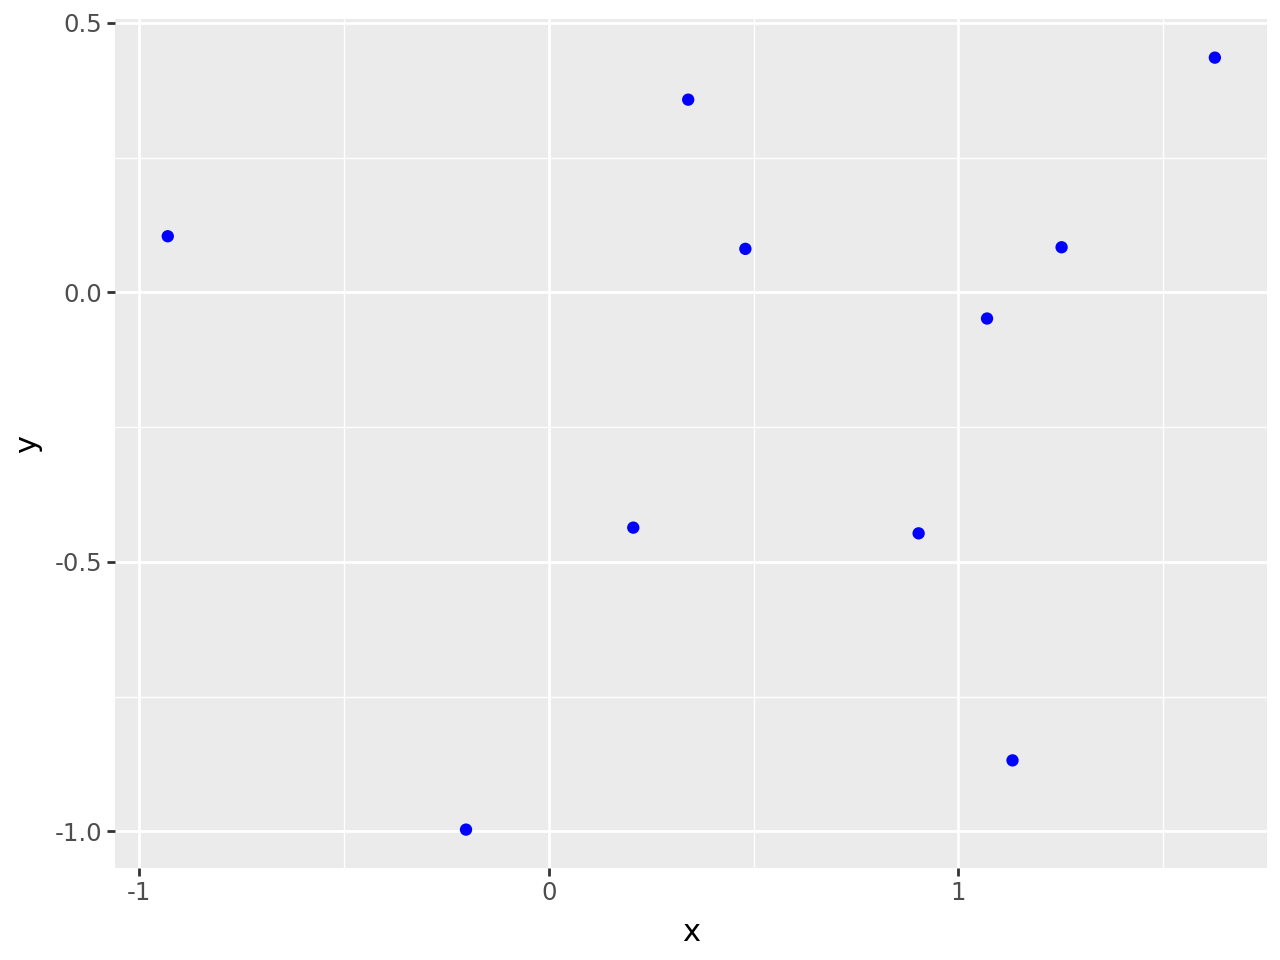

In [9]:
ggplot_mean_blue = ggplot(df_mean_blue) + aes(x= 'cx', y='cy') + geom_point(colour="blue") + xlab('x') + ylab('y')
ggplot_mean_blue

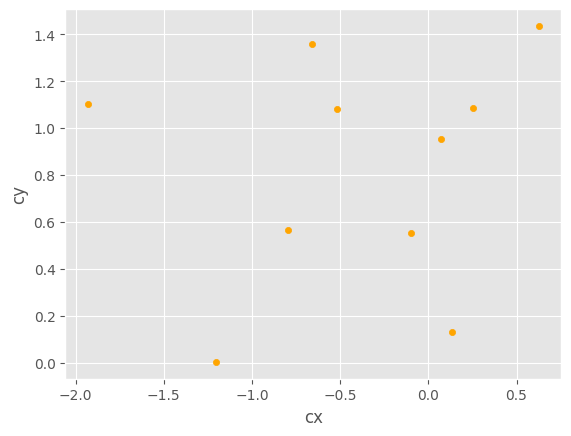

In [10]:
## creating the same theme as used in R using matplotlib.pyplot
plt.style.use('ggplot')

plt_mean_orange = df_mean_orange.plot.scatter(
    x = 'cx',
    y = 'cy',
    c = 'orange'
)
plt.show()

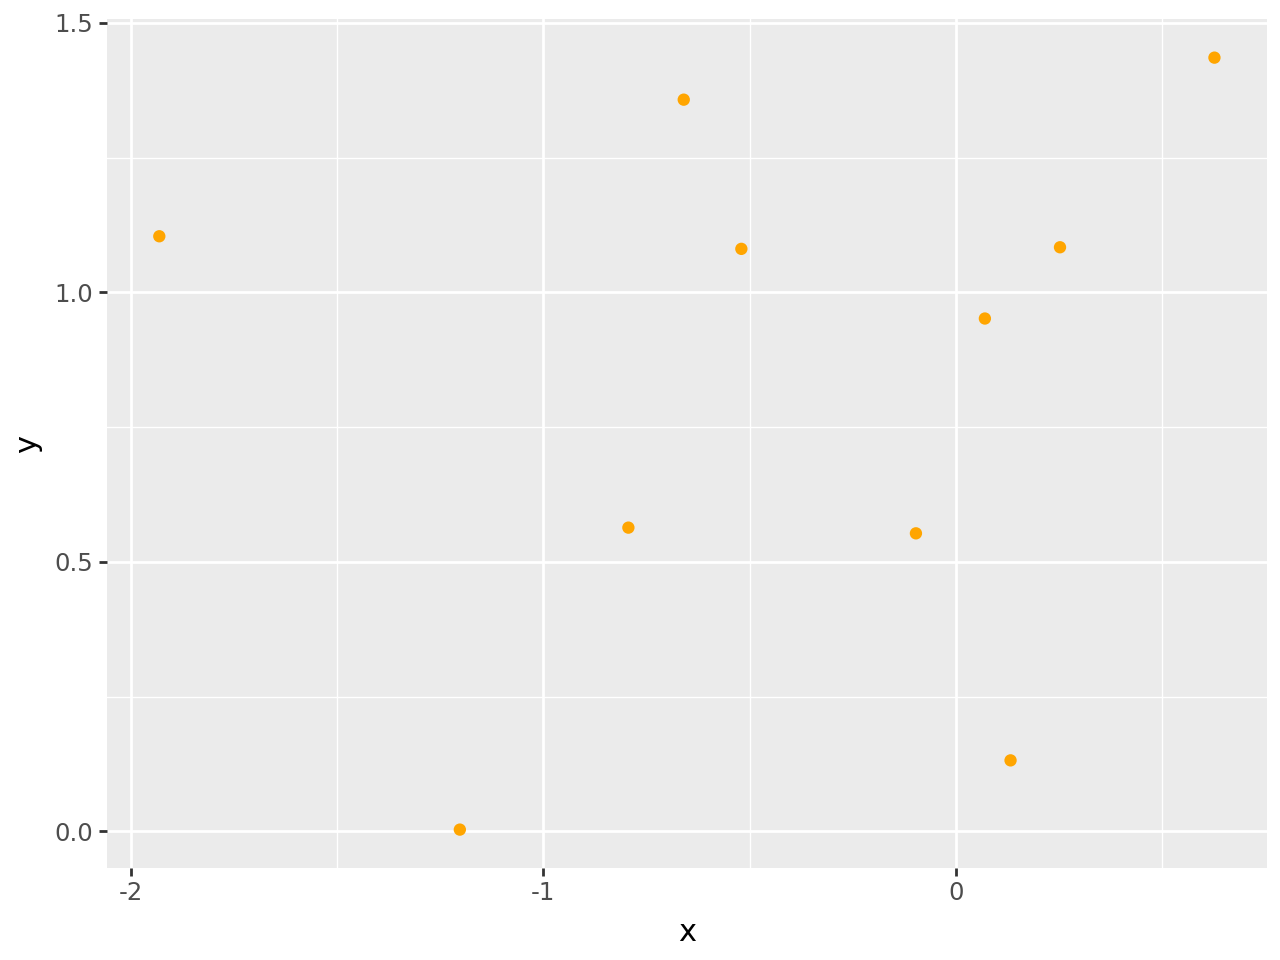

In [11]:
ggplot_mean_orange = ggplot(df_mean_orange) + aes(x= 'cx', y='cy') + geom_point(colour="orange") + xlab('x') + ylab('y')
ggplot_mean_orange

### joining plots

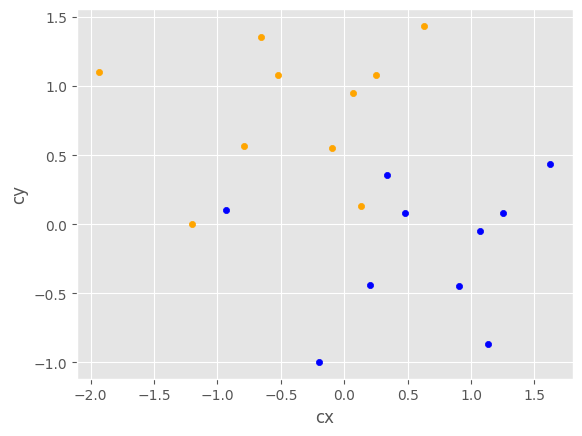

In [12]:
fig, ax = plt.subplots()

df_mean_blue.plot.scatter(
    x = 'cx',
    y = 'cy',
    c = 'blue',
    ax=ax
)
df_mean_orange.plot.scatter(
    x = 'cx',
    y = 'cy',
    c = 'orange',
    ax=ax
)

plt.show()


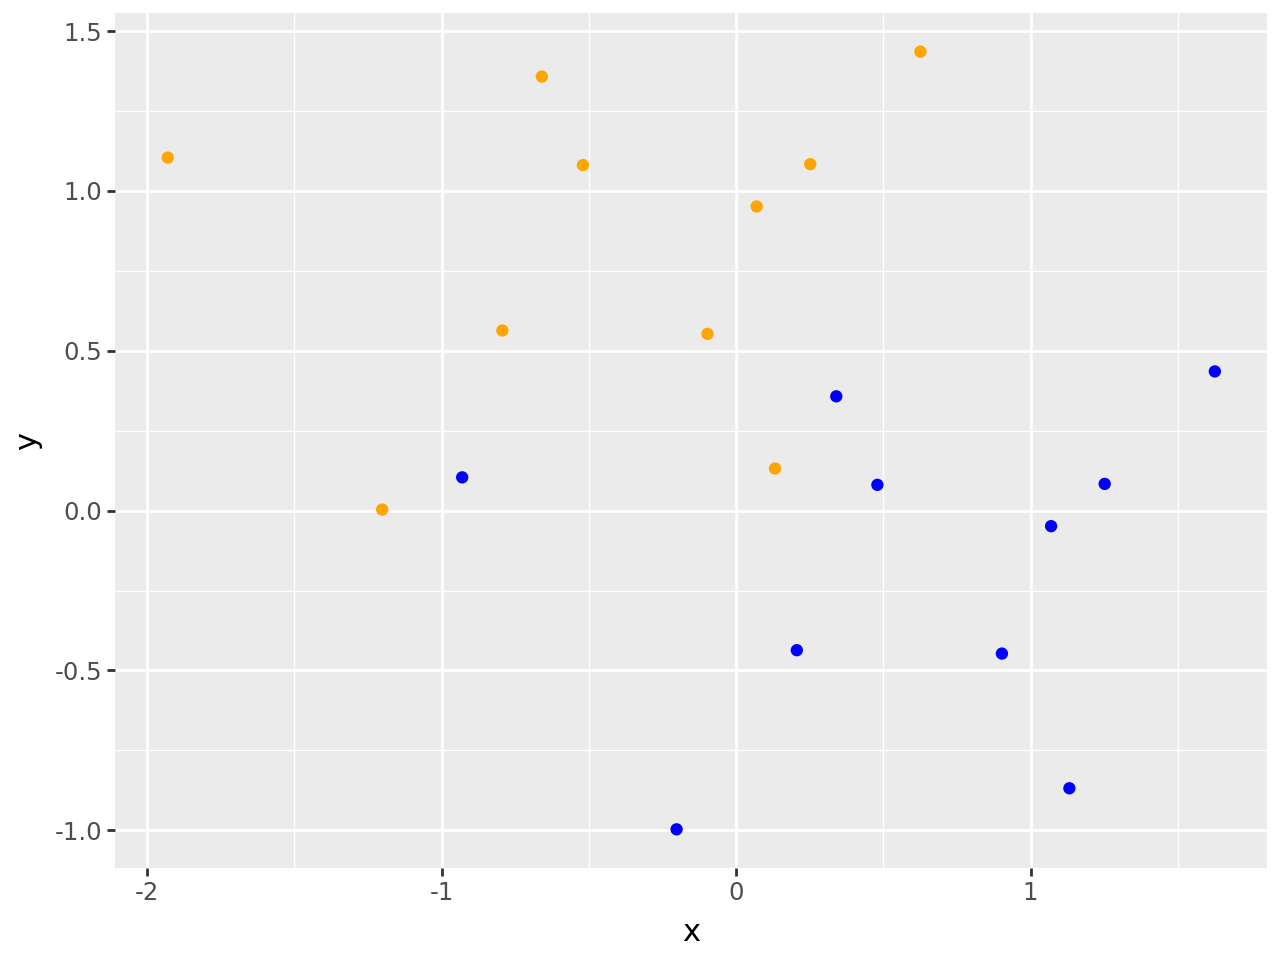

In [13]:
ggplot_mean_blue + geom_point(data=df_mean_orange, colour='orange') + aes(x='cx', y='cy') + xlab('x') + ylab('y')

## Modeling

Here we set up some tricks from the python built-in methods for avoiding for-loops as much as possible same Dr. Oraby aimed in the Statistical Learning course.

In [43]:
data_cov

array([[0.2, 0. ],
       [0. , 0.2]])

In [44]:
# setting seeds
random.seed(96)
npr.seed(96)

# setting variables for multivariate matrix
data_mean_blue = mean_blue[npr.randint(mean_blue.shape[0]),]
data_mean_orange = mean_orange[npr.randint(mean_orange.shape[0]),]
data_cov = (np.identity(2) / 5)


## here we use map function over a vector of length iterations to simulate repeat function in R
## example: np.array(list(map(lambda _: [np.random.randint(7),0], [None]*iterations)))
N = 200
data_blue = np.array(
    list(
        map(
            lambda _: 
                np.append(
                    npr.multivariate_normal(
                        size = 1,
                        mean = data_mean_blue,
                        cov = data_cov
                    )
                ,0), [None]*N
        )
    )
)

data_orange = np.array(
    list(
        map(
            lambda _: 
                np.append(npr.multivariate_normal(
                size = 1,
                mean = data_mean_orange,
                cov = data_cov
                ),1), [None]*N
        )
    )
)


In [45]:
# storing the data as data frames

data_blue = pd.DataFrame(data=data_blue, columns = ['cx', 'cy', 'Y'])
data_orange = pd.DataFrame(data=data_orange, columns = ['cx', 'cy', 'Y'])

**Note:** In jupyter notebooks, in case there is need to remove created variables we can use _%reset_selective <variables>_ command.

In [66]:
# joining data frames
mix_data = pd.concat([data_blue,data_orange], ignore_index = True, axis = 0)

In [67]:
# setting a shuffle over the rows of the data
mix_data = mix_data.sample(frac = 1, ignore_index = True)
mix_data

,cx,cy,Y
0,-0.265544,-0.483635,0.0
1,-1.522837,0.997454,1.0
2,-0.095303,-0.529834,0.0
3,-0.429226,-0.794303,0.0
4,-0.464034,-0.540052,0.0
...,...,...,...
395,-0.175511,-0.736175,0.0
396,-0.647900,0.491626,1.0
397,-1.354816,-1.499104,0.0
398,-0.340094,-0.580274,0.0


In [ ]:
## here we use map function over a vector of length iterations to simulate repeat function in R

iterations = 20
itr_list = list(map(lambda _: np.random.randint(7), [None]*iterations))


In [ ]:
npr.multivariate_normal(
    size = 1,
    mean = np.array([0,1]),
    cov = (np.identity(2) / 5)
)

In [ ]:
npr.choice(4,1)